# **Space X  Falcon 9 First Stage Landing Prediction**

## Assignment:  Machine Learning Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Função para criar matriz de confusão

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [3]:
# Carregando base de dados

import requests
from io import StringIO

# URL do arquivo CSV
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fazendo a requisição GET para obter os dados do CSV
response = requests.get(URL)

# Verificando se a requisição foi bem sucedida
if response.status_code == 200:
    # Lendo os dados do CSV a partir do texto do conteúdo da resposta
    csv_text = response.text

    # Usando StringIO para criar um objeto de arquivo compatível com pandas
    csv_file = StringIO(csv_text)

    # Lendo o CSV para um DataFrame do pandas
    data = pd.read_csv(csv_file)

    # Exibindo as primeiras linhas para verificar se os dados foram carregados corretamente
    print(data.head())
else:
    print(f"Erro ao obter o arquivo CSV. Código de status: {response.status_code}")

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

### TASK  1

Create a NumPy array from the column  <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [4]:
Y = data['Class'].to_numpy()

### TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [5]:
# students get this
transform = preprocessing.StandardScaler()

X = data[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']]

# Ajustar o transformador aos dados e transformá-los
X = transform.fit_transform(X)

# Opcional: converter de volta para DataFrame para manter a estrutura de dados
X = pd.DataFrame(X, columns=['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount'])

### TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [6]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verificar as formas dos conjuntos de dados resultantes
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (72, 5)
X_test shape: (18, 5)
Y_train shape: (72,)
Y_test shape: (18,)


## TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [7]:
# Estimando parâmetros

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [8]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

# Instânciando modelo
lr=LogisticRegression()

# Configurar o objeto GridSearchCV com cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustar o GridSearchCV aos dados de treinamento
logreg_cv.fit(X_train, Y_train)

# Imprimir os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros:", logreg_cv.best_params_)
print("Melhor pontuação:", logreg_cv.best_score_)

Melhores parâmetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor pontuação: 0.7446428571428572


In [9]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7446428571428572


### TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:

In [10]:
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Precisão nos dados de teste:", test_accuracy)

Precisão nos dados de teste: 0.8333333333333334


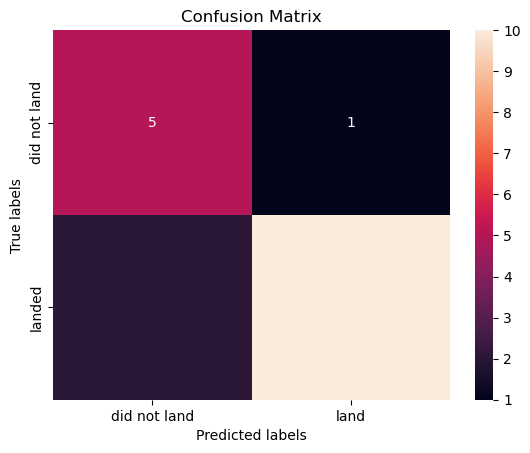

In [11]:
# Matriz de Confusão

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [12]:
# Definindo parâmetros
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Instânciando modelo
svm = SVC()

In [13]:
# Configurar o objeto GridSearchCV com cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar o GridSearchCV aos dados de treinamento
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.8589285714285715


### TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:

In [15]:
# Calcular a precisão nos dados de teste usando o melhor modelo encontrado
test_accuracy = svm_cv.score(X_test, Y_test)
print("Precisão nos dados de teste:", test_accuracy)

Precisão nos dados de teste: 0.8888888888888888


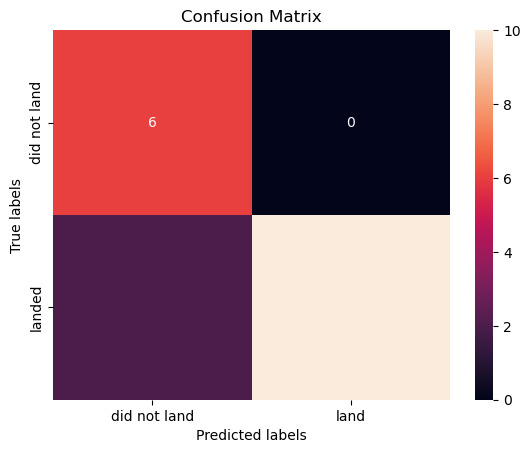

In [16]:
# Matriz de Confusão

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [17]:
# Definindo parâmetros
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Instânciado modelo
tree = DecisionTreeClassifier()

In [18]:
# Configurar o objeto GridSearchCV com cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar o GridSearchCV aos dados de treinamento
tree_cv.fit(X_train, Y_train)

C:\Users\rival\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rival\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rival\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\rival\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    v

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8303571428571429


### TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [20]:
# Calcular a precisão nos dados de teste usando o melhor modelo encontrado
test_accuracy = tree_cv.score(X_test, Y_test)
print("Precisão nos dados de teste:", test_accuracy)

Precisão nos dados de teste: 0.9444444444444444


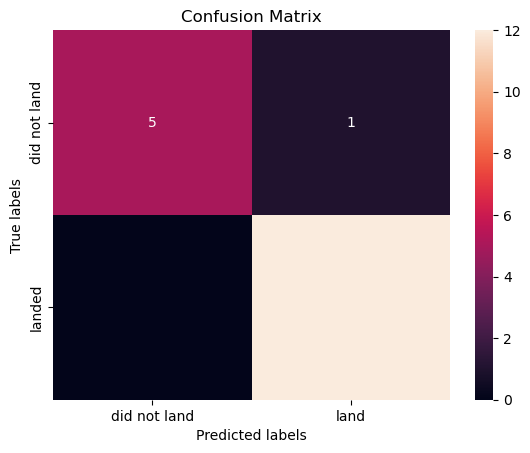

In [21]:
# Matriz de Confusão

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [22]:
# Definindo parâmetros
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Instânciando modelo
KNN = KNeighborsClassifier()

In [23]:
# Configurar o objeto GridSearchCV com cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar o GridSearchCV aos dados de treinamento
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [24]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8053571428571427


### TASK  11

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [25]:
# Calcular a precisão nos dados de teste usando o melhor modelo encontrado
test_accuracy = knn_cv.score(X_test, Y_test)
print("Precisão nos dados de teste:", test_accuracy)

Precisão nos dados de teste: 0.8333333333333334


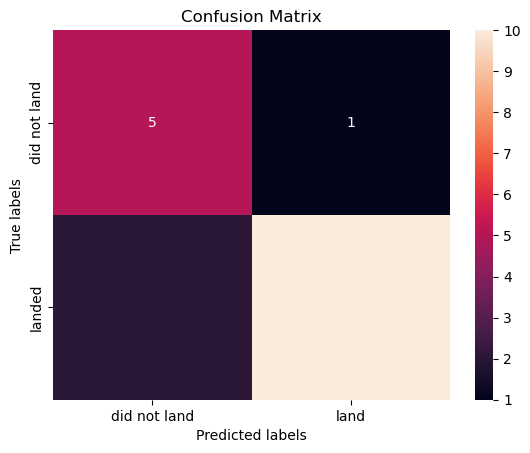

In [26]:
# Matriz de Confusão
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### TASK  12

Find the method performs best:

In [27]:
# Calcular a precisão nos dados de teste
logreg_accuracy = logreg_cv.score(X_test, Y_test)
svm_accuracy = svm_cv.score(X_test, Y_test)
tree_accuracy = tree_cv.score(X_test, Y_test)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Imprimir as precisões de cada modelo
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")

# Comparar e determinar o melhor método
best_accuracy = max(logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy)
best_method = ""
if best_accuracy == logreg_accuracy:
    best_method = "Logistic Regression"
elif best_accuracy == svm_accuracy:
    best_method = "SVM"
elif best_accuracy == tree_accuracy:
    best_method = "Decision Tree"
else:
    best_method = "KNN"

print(f"\nBest Performing Method: {best_method} with accuracy {best_accuracy}")

Logistic Regression Accuracy: 0.8333333333333334
SVM Accuracy: 0.8888888888888888
Decision Tree Accuracy: 0.9444444444444444
KNN Accuracy: 0.8333333333333334

Best Performing Method: Decision Tree with accuracy 0.9444444444444444
